Supervised learning is a type of machine learning where a model learns from labelled data—meaning every input has a corresponding correct output.

Types:
  1. Regression
  2. Classification

Steps:
  1. Collect Labeled Data
  2. Split the Dataset
  3. Train the Model
  4. Validate and Test the Model
  5. Deploy and Predict on New Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Regression Algorithms

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing(as_frame=True)

housing_data = housing.data
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
#Each value corresponds to the median house value in units of 100,000
housing_target = housing.target
housing_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
X, y = fetch_california_housing(return_X_y=True)

In [7]:
X[0][0], X[0][1]

(np.float64(8.3252), np.float64(41.0))

In [8]:
y[0]

np.float64(4.526)

Text(0, 0.5, 'Median House Value')

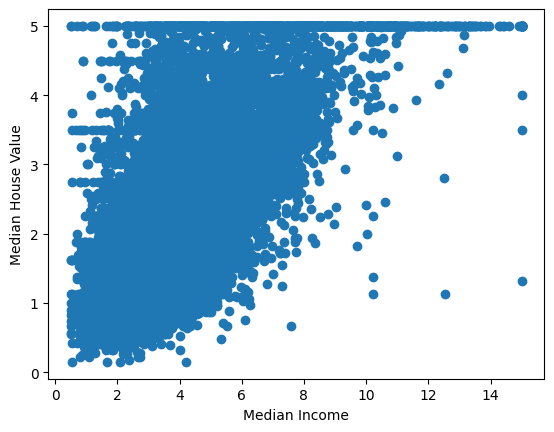

In [9]:
#check the scatterplot diagram between median_income and median_house_value

# the correlation is very strong, has an upward trend and not too dispersed

plt.scatter(X[:, 0], y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

array([[<Axes: title={'center': 'MedInc'}>]], dtype=object)

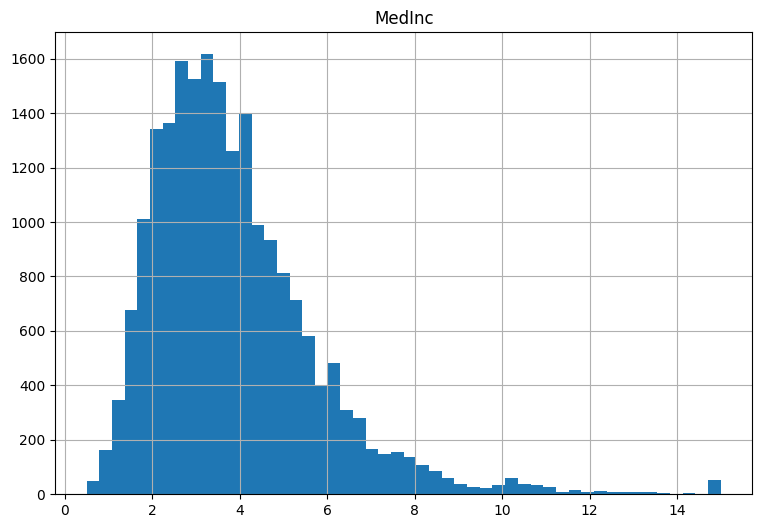

In [10]:
#MedInc histogram

#most median income values are clustered around 1.5 to 6

housing_data.hist(column='MedInc',
             bins=50, figsize=(9,6))

Linear Regression - Predict continuous output values

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#train test split data as 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
X_test.shape, y_test.shape

((6192, 8), (6192,))

In [13]:
X_test[:, 0]

array([4.1518, 5.7796, 4.3487, ..., 7.875 , 2.0658, 4.6761])

In [14]:
[min(y_test), max(y_test)]

[np.float64(0.14999), np.float64(5.00001)]

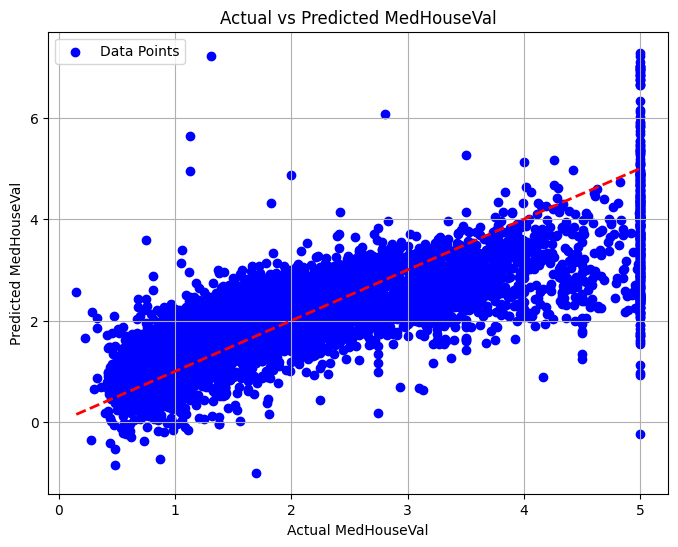

In [15]:
Y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, Y_pred, color='blue', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted MedHouseVal')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#compute the prediction error for the training data

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Y_pred)
mse

0.5431489670037245

Conclusion:

 - the prediction error is not satisfying

 - further improvements could be made by exploring more complex models or additional data preprocessing techniques

## Regression and Classification Algorithms

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_data_tree = scaler.fit_transform(housing_data)
housing_data_tree

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

Desicion Tree

A decision tree regressor is capable of identifying complex, non-linear relationships in the data.

In [18]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(housing_data_tree, housing_target, test_size = 0.2, random_state = 20)

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_tr, y_train_tr)
# predict the price
predicted_data_tr = tree_reg.predict(X_test_tr)
# pass the predicted data and identify the prediction error
tree_mse = mean_squared_error(y_test_tr, predicted_data_tr)
tree_mse

0.5526747057120397

Random Forest

Works by training many decision trees on random subsets of the features, thereby providing the average prediction data.

In [20]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(housing_data_tree, housing_target, test_size = 0.2, random_state = 20)

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_rf, y_train_rf)
# predict the price
predicted_data_rf = forest_reg.predict(X_test_rf)
# identify the prediction error
rf_mse = mean_squared_error(y_test_rf, predicted_data_rf)
rf_mse

0.25579440218149874

Conclusion: RandomForestRegressor performs better than DecisionTreeRegressor.

Support Vector Machines

It tries to find the best boundary known as hyperplane that separates different classes in the data.

Advantages:

    - Effective in high dimensional spaces and in cases where number of dimensions is greater than the number of samples

    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient

    - Different Kernel functions can be specified for the decision function

Disadvantages:

    - If the number of features is much greater than the number of samples,
    
      avoid over-fitting in choosing Kernel functions and regularization term is crucial

     - Do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [22]:
svm_data = housing_data.copy()
svm_data["MedHouseVal"] = housing_target
#svm_target = housing_target.to_frame()

#drop features
svm_data.drop(['AveBedrms', 'Population'], axis=1, inplace=True)
svm_data

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [23]:
# Correlation Coefficients: (picking a predictor variable to perform regression)
# MedInc is the closest to one

housing_corr_func = svm_data.corr()

predictor_correlation = housing_corr_func['MedHouseVal'].sort_values(ascending = False)
predictor_correlation

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Longitude,-0.045967
Latitude,-0.144160


In [24]:
train_svm, test_svm = train_test_split(svm_data, test_size=0.2, random_state=42)

In [25]:
# train and test datasets are sorted for plotting purpose
train_svm = train_svm.sort_values('MedInc')
test_svm = test_svm.sort_values('MedInc')

X_train_svm, X_test_svm = train_svm[['MedInc']], test_svm[['MedInc']]
y_train_svm, y_test_svm = train_svm['MedHouseVal'], test_svm['MedHouseVal']

In [26]:
from sklearn.svm import SVR

#linear kernel function
svr_lin = SVR(kernel = 'linear')
svr_lin.fit(X_train_svm, y_train_svm)


SVR(kernel='linear')

In [103]:
#non-linear kernel function
svr_poly = SVR(kernel = 'poly')
svr_poly.fit(X_train_svm, y_train_svm)

SVR(kernel='poly')

Text(0, 0.5, 'MedHouseVal')

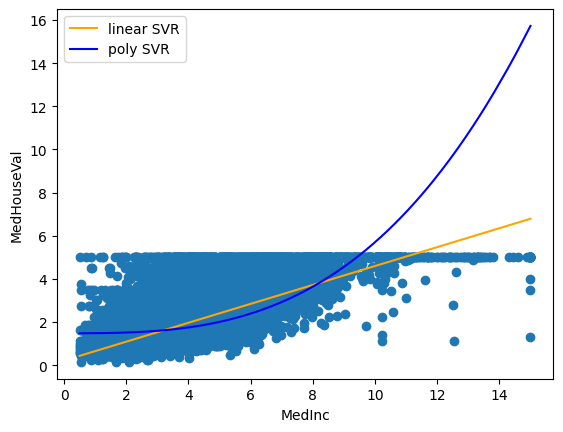

In [104]:
# Model prediction for train dataset
train_svm['linear_svr_pred'] = svr_lin.predict(X_train_svm)
train_svm['poly_svr_pred'] = svr_poly.predict(X_train_svm)

# Visualization train
plt.scatter(train_svm['MedInc'], train_svm['MedHouseVal'])
plt.plot(train_svm['MedInc'], train_svm['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train_svm['MedInc'], train_svm['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

Text(0, 0.5, 'MedHouseVal')

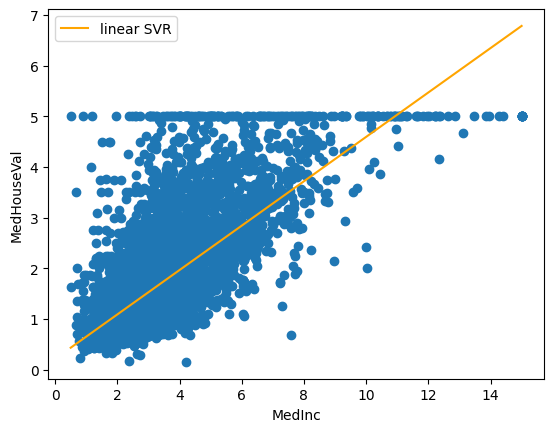

In [29]:
svm_pred = svr_lin.predict(X_test_svm)
test_svm["linear_svr_pred"] = svm_pred

# Visualization test
plt.scatter(test_svm['MedInc'], test_svm['MedHouseVal'])
plt.plot(test_svm['MedInc'], test_svm['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.legend()
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

Text(0, 0.5, 'Actual')

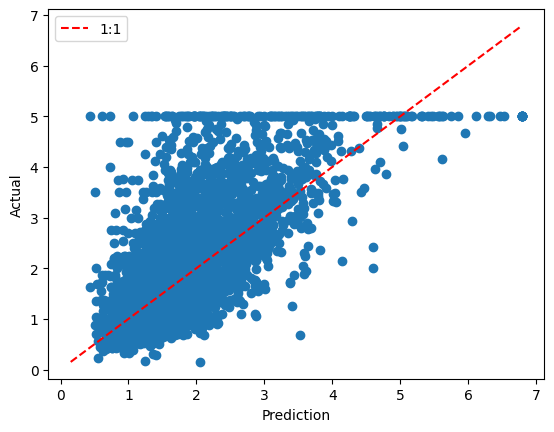

In [30]:
#Test dataset - plot
min_x = min(min(svm_pred), min(y_test_svm))
max_x = max(max(svm_pred), max(y_test_svm))
plt.scatter(svm_pred, y_test_svm)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [31]:
[min_x,max_x]

[0.14999, np.float64(6.786563151017817)]

In [32]:
svm_mse = mean_squared_error(y_test_svm, svm_pred)
svm_mse

0.7384325641488133

Conclusion:

0.74 represents the average magnitude of the residuals (prediction errors) between the actual and predicted values.

K-Nearest Neighbor

It works by finding the "k" closest data points (neighbors) to a given input
and makes a predictions based on the majority class (for classification) or the
average value (for regression).



Advantages:

  - No need to train as it just stores the data and uses it during prediction

  - Only needs to set the number of neighbors (k) and a distance method

  - Works for both classification and regression problems

Disadvantages:

  - Slow with large data, needs to compare every point during prediction

  - Struggles with many features, accuracy drops when data has too many features

  - It can overfit especially when the data is high-dimensional or not clean

Applications:

  - Recommendation Systems, suggests items like movies or products by finding
  
    users with similar preferences

  - Spam detection, identifies spam emails by comparing new emails to known
  
    spam and non-spam examples

  - Customer segmentation, groups customers by comparing their shopping
  
    behavior to others

  - Speech recognition, matches spoken words to known patterns to convert them
  
    into text



In [33]:
svm_data

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


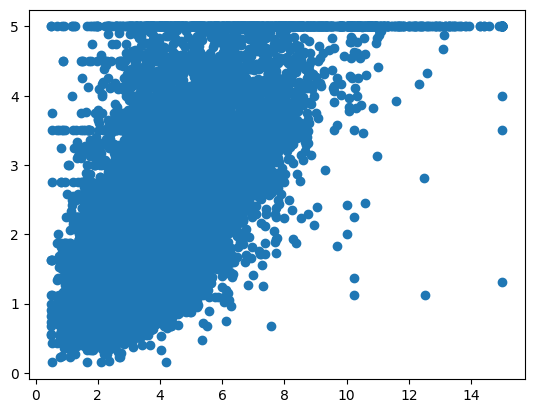

In [34]:
#predictor (x) variable: MedInc because of its correlation coeficient
X_knn = svm_data[['MedInc']]

#response (y) variable:
y_knn = svm_data['MedHouseVal']

plt.scatter(X_knn, y_knn)
plt.show()

In [35]:
import random

# test size of 40% and a train size of 60%
# random_state - to ensure reproducibility
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size = 0.4, train_size = 0.6, random_state = 21)

# 10% of total size - ensure good visibility in KNN regression line
sample_size = 2000

#sample coefficients
indices = random.sample(range(len(X_train_knn)), sample_size)
indices[:5]

[2778, 935, 11723, 11314, 6977]

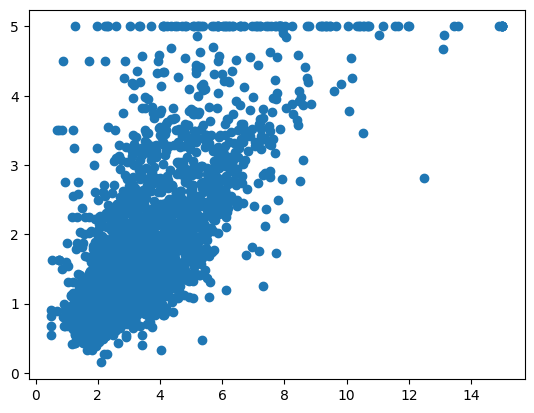

In [36]:
# randomed X, y
X_randomed_knn = X_train_knn.iloc[indices]
y_randomed_knn = y_train_knn.iloc[indices]

plt.scatter(X_randomed_knn, y_randomed_knn)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


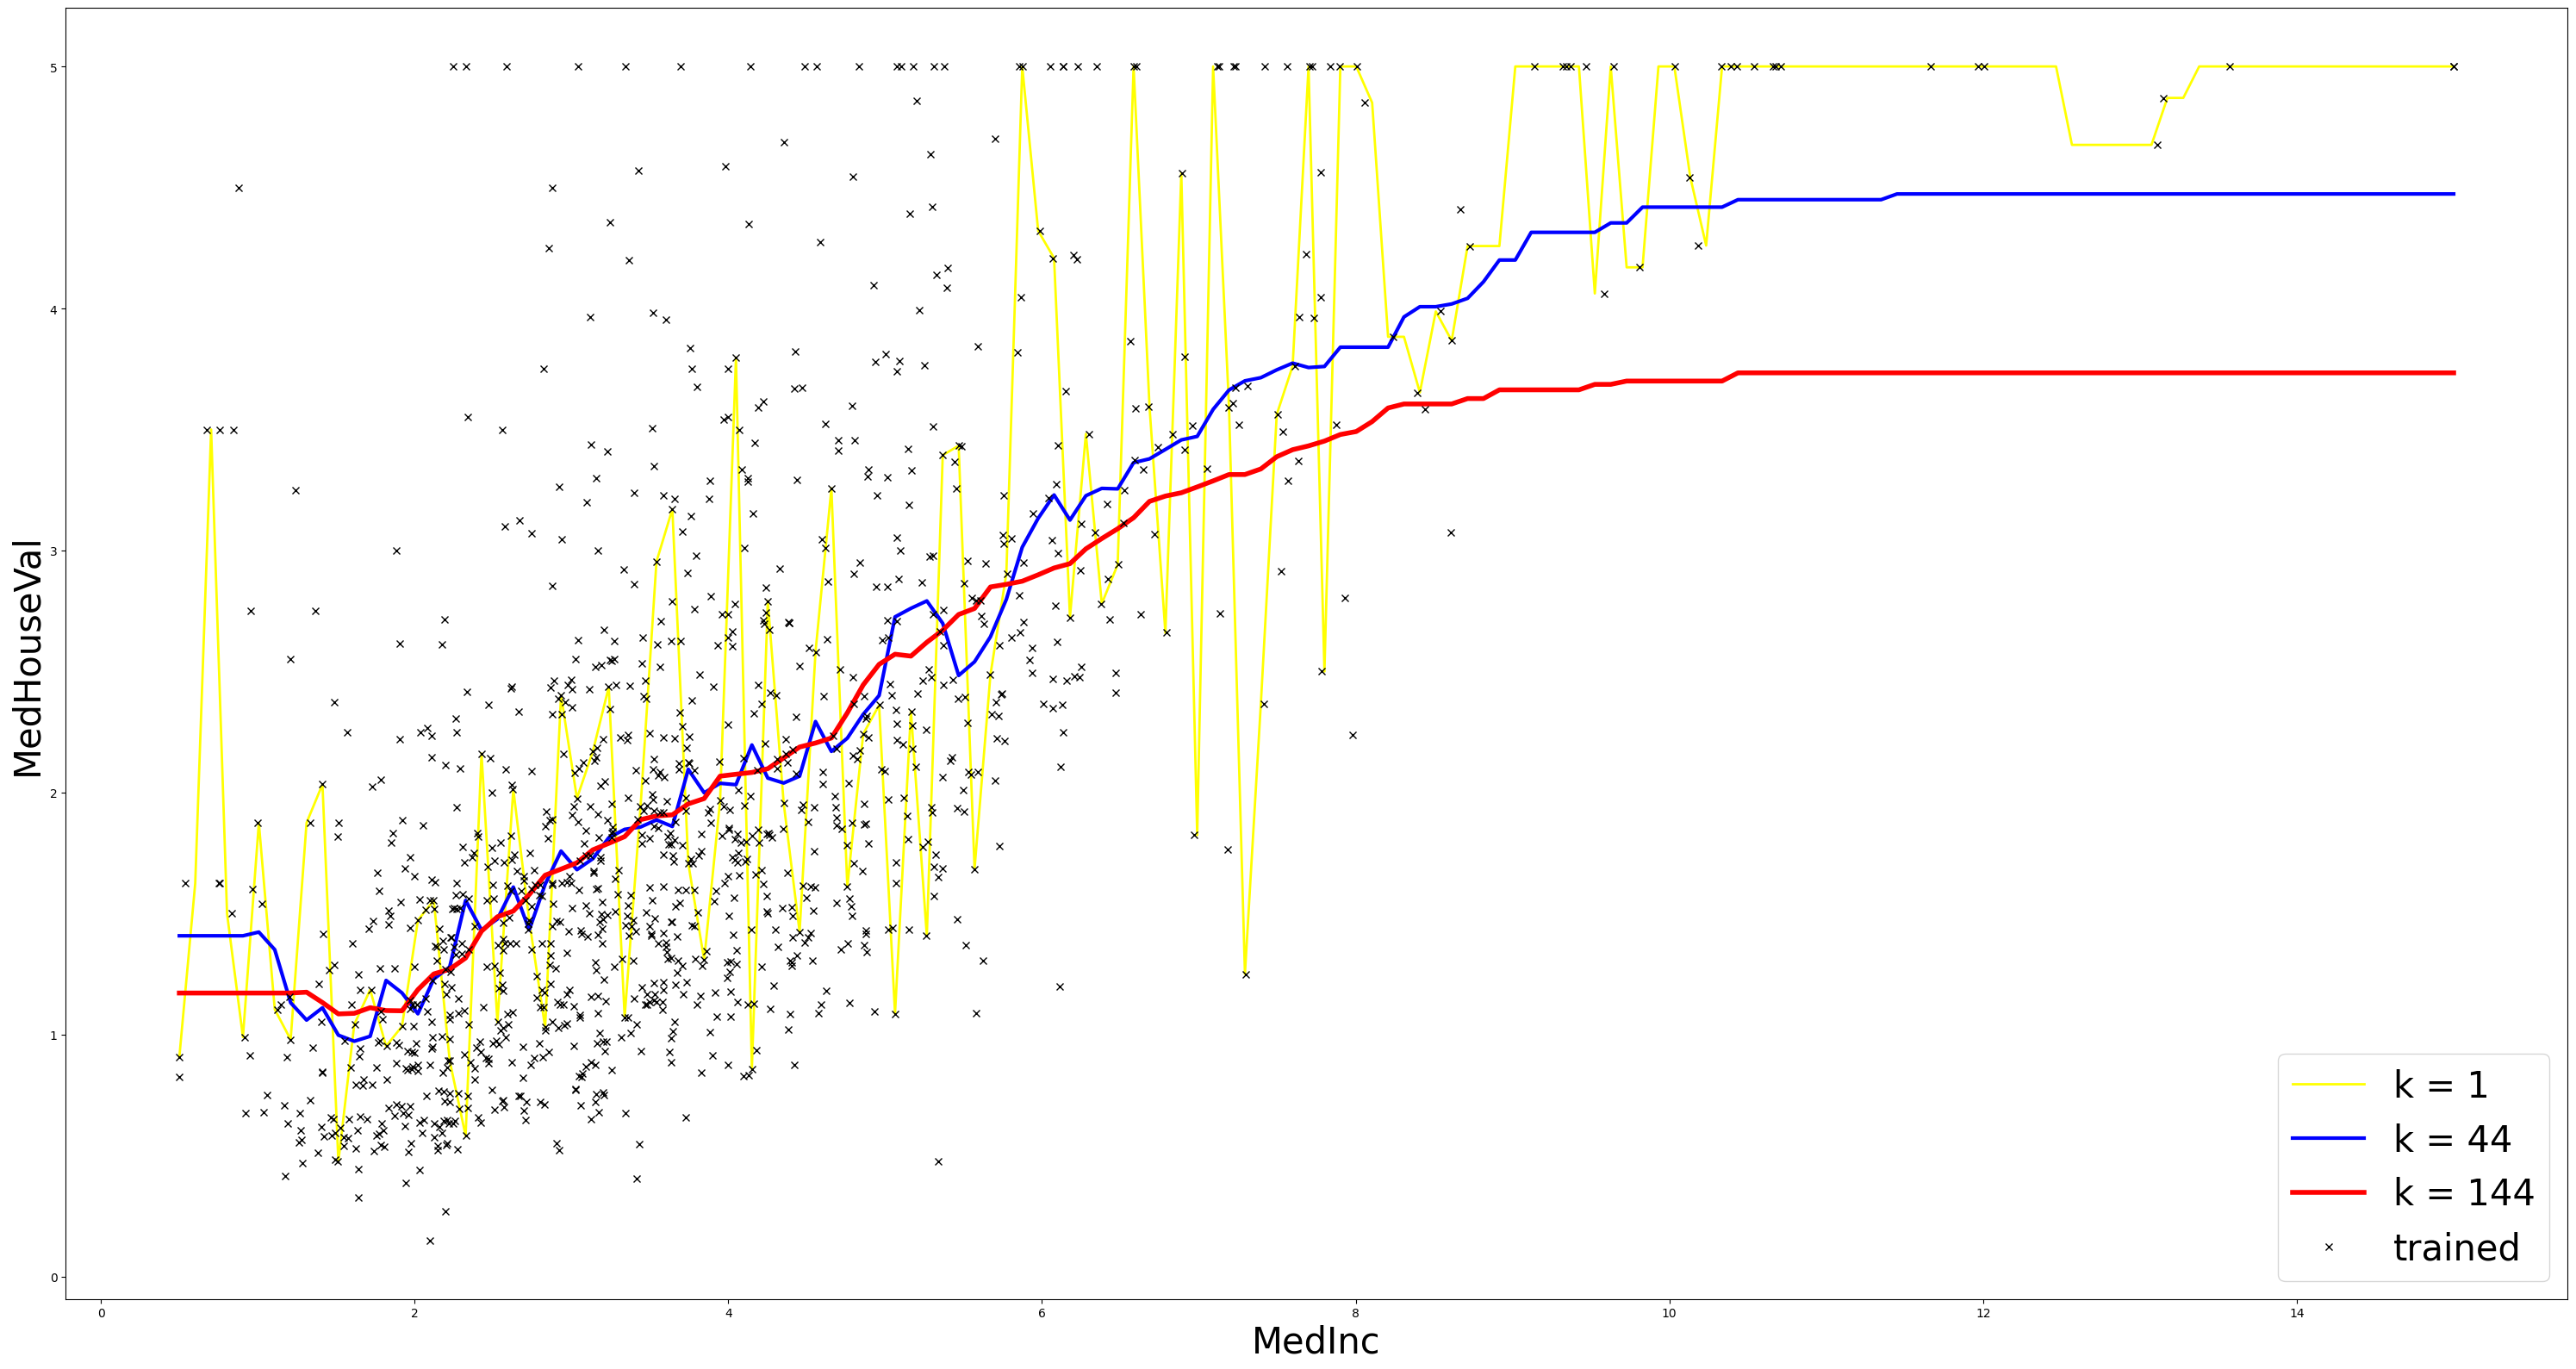

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# checkhow well the KNN Regression Line fits against the data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_randomed_knn, y_randomed_knn, test_size = 0.4, train_size = 0.6, random_state = 21)

# set K-value of 144 as the max because it is the square root of 12
# cCreates an array of 144 random numbers between 0 and 144.
k_list = np.linspace(1, 144, 144)

fig, ax = plt.subplots(figsize=(30,16))
k_dict = {}
i = 0
# loop through out k list
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k))
    # train our model
    model.fit(X_train_knn, y_train_knn)

    # fit model with test data
    y_pred_knn = model.predict(X_test_knn)
    color = ['yellow', 'blue', 'red']
    if k in [1, 44, 144]:
        # predict 144 random variables
        xnew = np.linspace(X_randomed_knn.min(), X_randomed_knn.max(), 144)
        ynew = model.predict(xnew)
        # print(xnew, ynew)
        ax.plot(xnew, ynew, '-', label = f'k = {int(k)}', linewidth = i+2, color = color[i])
        i+=1
    # storing MSE values
    knn_MSE = mean_squared_error(y_test_knn, y_pred_knn)
    k_dict[k] = knn_MSE

#plot trained variables
ax.plot(X_train_knn, y_train_knn, 'x', label ='trained', color='k')

ax.set_xlabel('MedInc', fontsize = 30)
ax.set_ylabel('MedHouseVal', fontsize = 30)
plt.tight_layout()
ax.legend (loc = 'lower right', fontsize = 30)
plt.show()

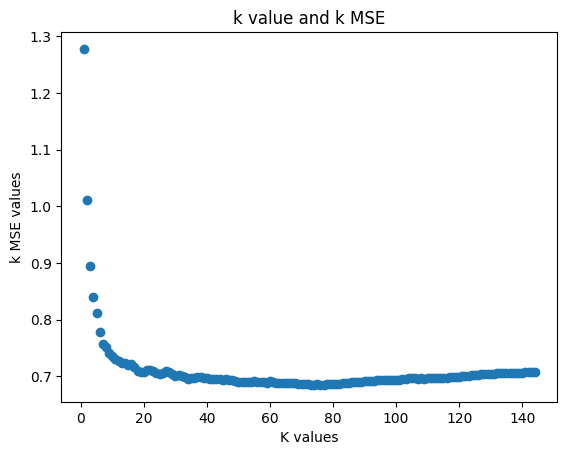

In [38]:
# Make sure there is a relationship between K-values and MSE that corresponds to it
plt.scatter(list(k_dict.keys()), list(k_dict.values()))
plt.xlabel('K values')
plt.ylabel('k MSE values')
plt.title('k value and k MSE')
plt.show()

Conclusion:

The KNN regression prediction model is moderately successful as it depicted a somewhat positive relationship between the predictor and response variable.

Improvements - adding more measures of accuracy and different prediction models with a variety of other variables to see if there is a stronger model performance.


Gradient Boosting

It uses an ensemble of decision trees to predict a target label.

Typically, the maximum number of leaves is between 8 and 32.

Gradient Boosting is a boosting algorithm and here each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to predictions and then trains a new weak model to predict this gradient. Predictions of the new model are then added to the ensemble (all models prediction) and the process is repeated until a stopping criterion is met.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

X_gb = svm_data[['MedInc']]
y_gb = svm_data['MedHouseVal']

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_knn, y_knn, test_size = 0.4, train_size = 0.6, random_state = 21)

model_gb = GradientBoostingRegressor(n_estimators=100)
model_gb.fit(X_train_gb, y_train_gb)

GradientBoostingRegressor()

In [40]:
predictions_gb = model_gb.predict(X_test_gb)
predictions_gb

array([1.08554769, 1.49510709, 2.2444217 , ..., 2.37406452, 1.35760246,
       4.86878999])

In [41]:
X_id = X_test_gb.index
X_id

Index([18726,  1046, 15508,   828, 19007, 10287,  4330, 11387,  4603, 18325,
       ...
       16324,  9324, 15821,  9379,  7929,   607,  9523,  1879,  4817,  5247],
      dtype='int64', length=8256)

In [42]:
test_score = np.zeros((10,), dtype=np.float64)
test_score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
#predict class for X
y_pred = model_gb.predict(X_test_gb)
y_pred

array([1.08554769, 1.49510709, 2.2444217 , ..., 2.37406452, 1.35760246,
       4.86878999])

In [44]:
#Predict class at each stage for X
for y_staged_pred in model_gb.staged_predict(X_test_gb):
    print(y_staged_pred)

[1.98245288 2.02223049 2.09555895 ... 2.09555895 1.98245288 2.31910453]
[1.90509176 1.98118995 2.11836859 ... 2.11836859 1.90509176 2.56507777]
[1.83011276 1.93262829 2.13071126 ... 2.13071126 1.8565301  2.76859054]
[1.76263167 1.88875182 2.14131665 ... 2.14131665 1.81265363 2.95175203]
[1.6966108  1.84701584 2.15388558 ... 2.15388558 1.77091765 3.13446052]
[1.63875795 1.80919785 2.15682808 ... 2.18146311 1.73309966 3.28381424]
[1.59227841 1.78495228 2.17106497 ... 2.1957     1.68662012 3.43331651]
[1.54329287 1.75385753 2.1735746  ... 2.21825629 1.65552537 3.55488594]
[1.50248559 1.73213517 2.18629984 ... 2.23098153 1.63380301 3.67985302]
[1.46818937 1.71433545 2.19402246 ... 2.23870416 1.59950679 3.7923234 ]
[1.43065187 1.69150205 2.19589102 ... 2.25530862 1.57667339 3.88159734]
[1.39686811 1.66815169 2.19693191 ... 2.27025265 1.55332303 3.97021308]
[1.36964055 1.65397143 2.20546551 ... 2.27878625 1.53914277 4.06373348]
[1.3465823  1.63091318 2.20690288 ... 2.29105438 1.51608452 4.14

In [45]:
y_staged_pred.shape

(8256,)

In [46]:
# calculate the error of each stage
estimator_count = 100 #equals to n_estimators in GB model
test_score_gb = np.zeros(estimator_count, dtype=np.float64)
for i, y_predict_gb in enumerate(model_gb.staged_predict(X_test_gb)):
    test_score_gb[i] = mean_squared_error(y_test_gb, y_predict_gb)

test_score_gb

array([1.21236625, 1.11339011, 1.03214965, 0.96571967, 0.91212462,
       0.86827851, 0.83293023, 0.80387194, 0.78043663, 0.76144051,
       0.74583022, 0.73316713, 0.72285723, 0.71445138, 0.70771019,
       0.70214975, 0.69768465, 0.69395043, 0.69098089, 0.68871928,
       0.68696174, 0.68539463, 0.68400159, 0.68296097, 0.68213386,
       0.68147407, 0.68086205, 0.68051394, 0.68014702, 0.67982279,
       0.67960965, 0.6793176 , 0.67916731, 0.6790834 , 0.67899314,
       0.67882315, 0.67868641, 0.67860043, 0.67854118, 0.67846968,
       0.67851524, 0.67858246, 0.67865692, 0.67858911, 0.67862365,
       0.67860647, 0.6785577 , 0.67860484, 0.67857691, 0.67854162,
       0.67857848, 0.67857083, 0.67863209, 0.67861547, 0.67852213,
       0.67852474, 0.67847974, 0.67842005, 0.67841595, 0.67844333,
       0.67856686, 0.67853259, 0.67852168, 0.67872479, 0.67872574,
       0.67874536, 0.67883387, 0.67881949, 0.67887133, 0.67888481,
       0.6789235 , 0.67890546, 0.67895777, 0.67899952, 0.67896

In [47]:
model_gb.train_score_.shape

(100,)

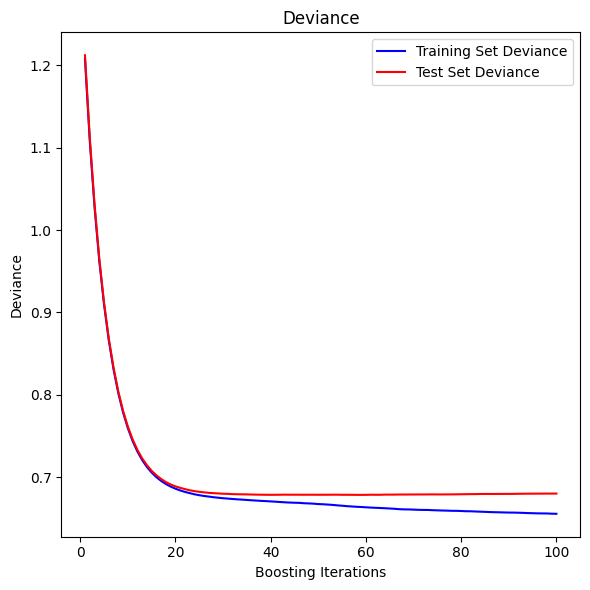

In [49]:
# plot training deviance
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(estimator_count) + 1,
    model_gb.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(estimator_count) + 1, test_score_gb, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()



## Classification Algorithms

In [50]:
#discretize the target variable MedHouseVal into three categories: 'low', 'medium', and 'high'.
#This is done by dividing the values of the target variable into 3 bins.

bins = [0, 1.5, 3.5, 5.0]  # Defining the bins
labels = [0, 1, 2]  # Labels for the bins- 0 for low, 1 for medium and 2 for high
housing_data_np = housing_data.copy()
housing_data_np['HousePriceCategory'] = pd.cut(housing_target, bins=bins, labels=labels)
housing_data_np.HousePriceCategory

,HousePriceCategory
0,2
1,2
2,2
3,1
4,1
...,...
20635,0
20636,0
20637,0
20638,0


In [51]:
#check for Nan values
housing_data_np.HousePriceCategory.isnull().sum()

np.int64(965)

In [52]:
housing_data_np.loc[housing_data_np.HousePriceCategory.isnull()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePriceCategory
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,NaN
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,NaN
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,NaN
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,NaN
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,NaN
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,NaN
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,NaN
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,NaN
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,NaN


In [53]:
housing_target.iloc[89]

np.float64(5.00001)

In [54]:
#drop null values
housing_data_np = housing_data_np.dropna(subset=['HousePriceCategory'])
housing_data_np

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePriceCategory
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0


In [55]:
X_nb = housing_data_np.drop(['HousePriceCategory'], axis=1)  # Features
y_nb = housing_data_np['HousePriceCategory']  # Target (discretized)

X_nb

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [56]:
y_nb

,HousePriceCategory
0,2
1,2
2,2
3,1
4,1
...,...
20635,0
20636,0
20637,0
20638,0


In [57]:
#train-test split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42)

Logistic Regression - Predict binary output variable

In [64]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
model_reg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
model_reg.fit(X_train_nb, y_train_nb)

LogisticRegression(random_state=0, solver='liblinear')

In [67]:
#predict results
y_pred_reg = model_reg.predict(X_test_nb)
y_pred_reg

array([0, 1, 1, ..., 1, 1, 1])

In [69]:
#evaluate the model's accuracy and generate the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_reg = accuracy_score(y_test_nb, y_pred_reg)
conf_matrix_reg = confusion_matrix(y_test_nb, y_pred_reg)
conf_matrix_reg

array([[1622,  669,    1],
       [ 456, 2635,    9],
       [  12,  480,   19]])

Gaussian Naive Bayes - Predict class based on feature independence assumption



A type of Naive Bayes method working on continuous attributes and the data features that follows Gaussian distribution throughout the dataset.

In [58]:
#Apply Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_nb, y_train_nb)

GaussianNB()

In [76]:
#make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_nb)

accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)

In [77]:
y_pred_nb

array([1, 1, 2, ..., 1, 1, 1])

In [78]:
accuracy_nb

0.4861934609520583

In [79]:
conf_matrix_nb

array([[ 723, 1378,  191],
       [ 145, 1766, 1189],
       [   7,  123,  381]])

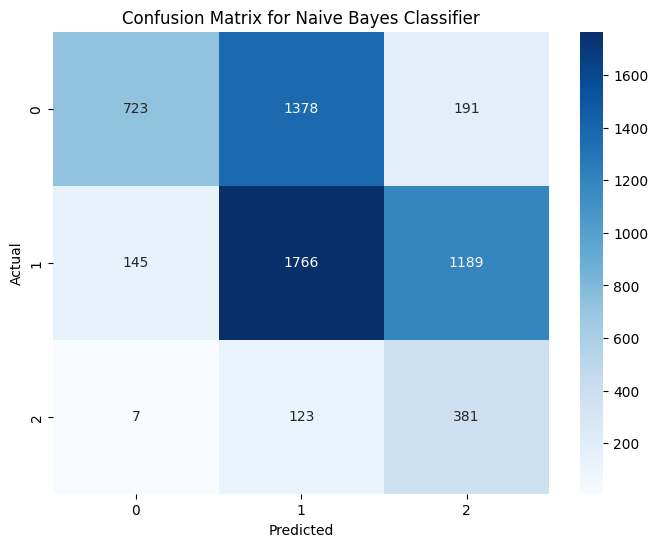

In [80]:
#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Conclusion:

The Naive Bayes classifier accuracy is 48.6% on the test set.

The confusion matrix:

  - bad performance for low and high house price categories
  
  - better predicting the medium category.

Further improvements could include feature engineering, trying different models, or tuning hyperparameters for better accuracy.

In [101]:
count_0 = sum(1 for x in y_test_nb if x == 0)
count_1 = sum(1 for x in y_test_nb if x == 1)
count_2 = sum(1 for x in y_test_nb if x == 2)

count_0, count_1, count_2

(2292, 3100, 511)

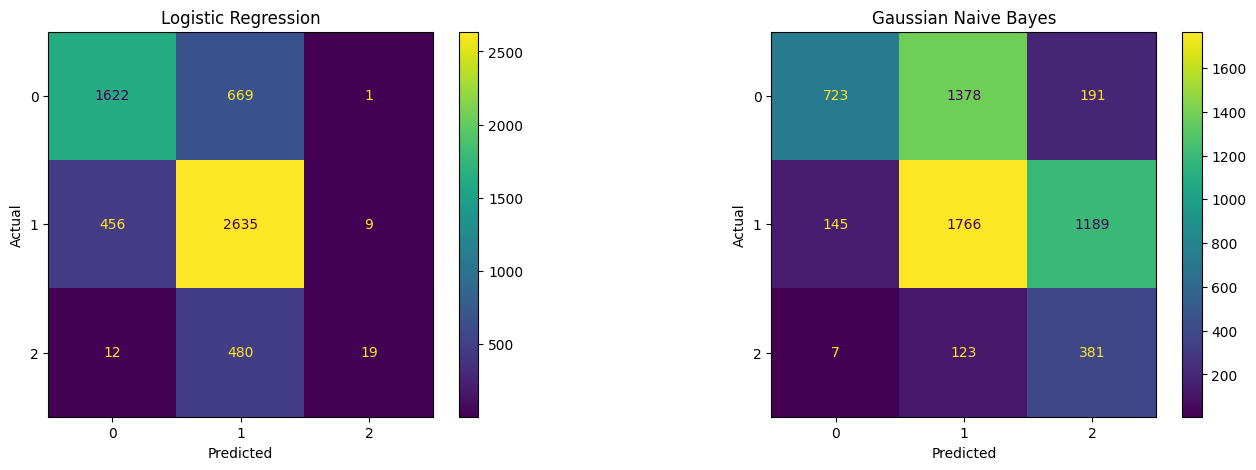

In [96]:
# compare confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp_reg = ConfusionMatrixDisplay(conf_matrix_reg)
disp_nb = ConfusionMatrixDisplay(conf_matrix_nb)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

disp_reg.plot(ax=ax1)
disp_reg.ax_.set_title('Logistic Regression')
disp_reg.ax_.set_xlabel('Predicted')
disp_reg.ax_.set_ylabel('Actual')

disp_nb.plot(ax = ax2)
disp_nb.ax_.set_title('Gaussian Naive Bayes')
disp_nb.ax_.set_xlabel('Predicted')
disp_nb.ax_.set_ylabel('Actual')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
#f.colorbar(disp_reg.im_, ax=axes)
plt.show()


In [102]:
#compare accurancy
print(f'Logistic Regression Accuracy: {accuracy_reg}')
print(f'Naive Bayes Accuracy: {accuracy_nb}')

Logistic Regression Accuracy: 0.7243774352024395
Naive Bayes Accuracy: 0.4861934609520583


Conclusion: Logistic Regression performs better than Naive Bayes classifier.